In [1]:
import sys
sys.path.append('..')

In [2]:
import simtools as st

In [3]:
datapath = '../data/'  # comment this line and uncomment the following line to use new data created with
# datapath = 'data/'   # the `create_data.ipynb` notebook in this directory

# Figure 4

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import discretisedfield as df

In [5]:
all_data = pd.read_csv(datapath + 'figure4.csv')

In [6]:
# create new arrays for (l, w) pairs and the corresponding BP number

ll, ww = np.meshgrid(all_data.length.unique(), all_data.width.unique())

min_energy_bps = np.zeros_like(ll, dtype=float)

for i, (l, w) in enumerate(zip(ll.flat, ww.flat)):
    try:
        min_energy_bps.flat[i] = all_data.loc[(all_data['length'] == l) & (all_data['width'] == w)].sort_values('E').iloc[0]['bp_number']
    except IndexError:
        min_energy_bps.flat[i] = np.nan

In [7]:
# linear interpolation between neighbouring areas with different BP numbers

transitions = [[] for _ in range(8)]
for i, col in enumerate(min_energy_bps.T):  # shape is (y, x)
    div = col[1:] - col[:-1]
    for j in np.argwhere(div):
        index = int(min_energy_bps[j, i]) - 2  # zero-based indexing vs 2-based for minimum
        transitions[index].append([i, j[0] + 0.5])

for j, row in enumerate(min_energy_bps):  # shape is (y, x)
    div = row[1:] - row[:-1]
    for i in np.argwhere(div):
        index = int(min_energy_bps[j, i]) - 1  # zero-based indexing vs 1-based for minimum
        transitions[index].append([i[0] + 0.5, j])

transitions = [np.array(sorted(t)) for t in transitions]
interp = [np.polynomial.Polynomial.fit(t[:, 0], t[:, 1], deg=1) for t in transitions]

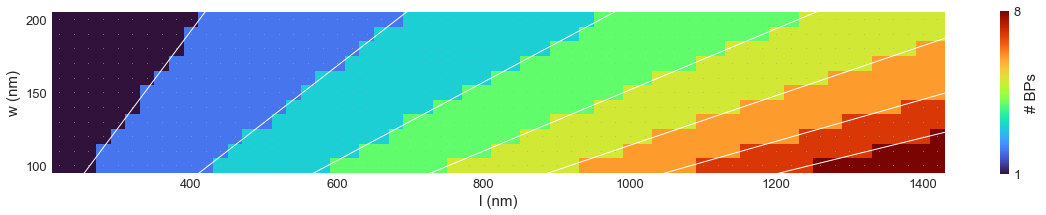

In [8]:
fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(min_energy_bps[:, :61], origin='lower', cmap='turbo')
plt.scatter(*np.meshgrid(range(69), range(11)), marker='.', color='darkgrey', s=1)
for t, inter in zip(transitions[:-1], interp):
    xx = np.linspace(np.min(t[:, 0])- 10, np.max(t[:, 0]) + 10, 100)
    ax.plot(xx, inter(xx), c="white", linewidth=1)
    
ax.set_xlim(-.5, 60.5)
ax.set_ylim(-.5, 10.5)
ax.set_xlabel('l (nm)')
ax.set_ylabel('w (nm)')
ax.set_xticks(range(9, 60, 10))
ax.set_xticklabels(ll[0][9:60:10])
ax.set_yticks([0, 5, 10])
ax.set_yticklabels(['100', '150', '200'])
fig.colorbar(im, label='# BPs', ticks=[1, 8])